In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [49]:
df = pd.read_csv('data/TimeAge.csv')
df

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


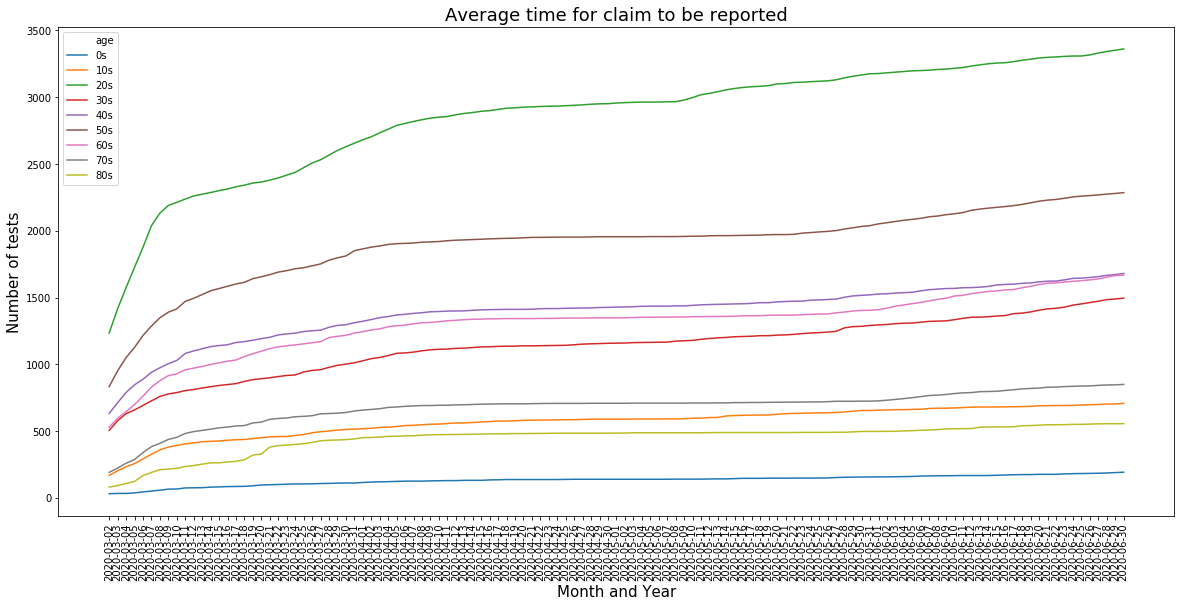

In [4]:
plt.figure(figsize=(20,9))
sns.lineplot(data=df, 
             x='date',
             y='confirmed', 
             hue = 'age')
plt.xlabel("Month and Year", size=15)
plt.ylabel("Number of tests", size=15)
plt.title("Average time for claim to be reported", size=18)
plt.xticks(rotation=90);

In [108]:
df['date'] = pd.to_datetime(df['date'])
df['confirmed'] = pd.to_numeric(df['confirmed'])
df['deceased'] = pd.to_numeric(df['deceased'])

df_confirmed_pivot = (df.pivot_table(index=['date'], 
                     columns=['age'],
                     values=['confirmed']).reset_index())
#print(df_confirmed_pivot)
df_age_diff = df_confirmed_pivot.diff(axis = 0)
#print(df_age_diff)
#print(df_confirmed_pivot['date'])
df_age_diff = pd.concat([df_confirmed_pivot['date'],df_age_diff['confirmed']], axis = 1)
#print(df_age_diff)
df_age_diff = df_age_diff.iloc[1:]

df_daily_confirmed_melt = pd.melt(df_age_diff, id_vars=['date'], value_vars=[
                                                                '0s',
                                                                '10s',
                                                                '20s',
                                                                '30s',
                                                                '40s',
                                                                '50s',
                                                                '60s',
                                                                '70s',
                                                                '80s'])
df_daily_confirmed_melt

,date,variable,value
0,2020-03-03,0s,2.0
1,2020-03-04,0s,0.0
2,2020-03-05,0s,4.0
3,2020-03-06,0s,7.0
4,2020-03-07,0s,7.0
...,...,...,...
1075,2020-06-26,80s,2.0
1076,2020-06-27,80s,2.0
1077,2020-06-28,80s,1.0
1078,2020-06-29,80s,0.0


,date,variable,value
0,2020-03-03,0s,2.0
1,2020-03-04,0s,0.0
2,2020-03-05,0s,4.0
3,2020-03-06,0s,7.0
4,2020-03-07,0s,7.0
...,...,...,...
1075,2020-06-26,80s,2.0
1076,2020-06-27,80s,2.0
1077,2020-06-28,80s,1.0
1078,2020-06-29,80s,0.0


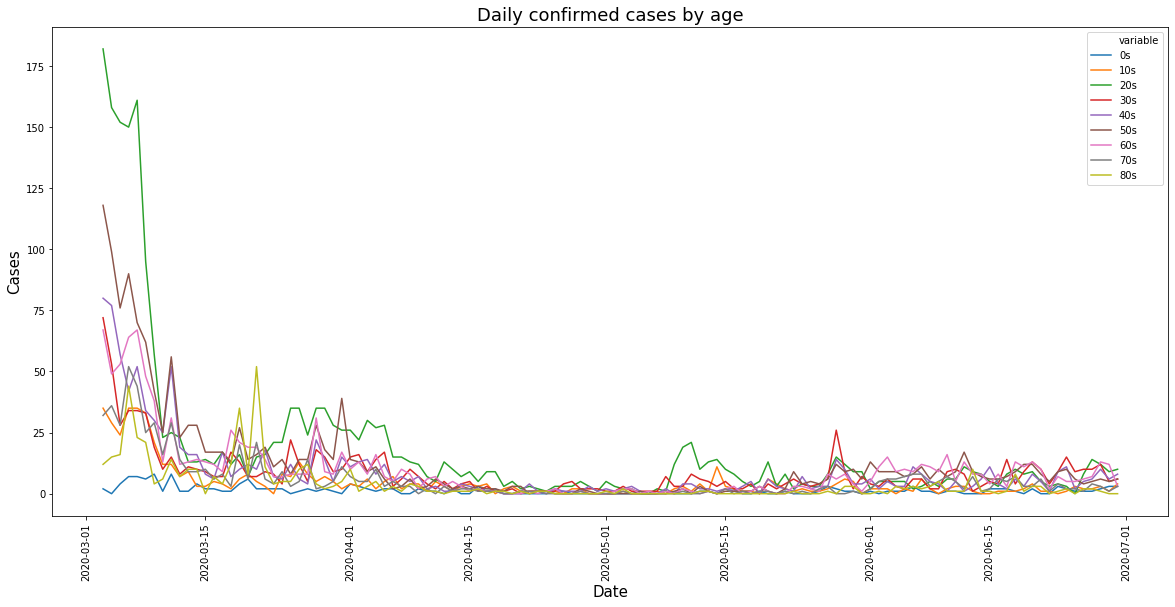

In [110]:
plt.figure(figsize=(20,9))
sns.lineplot(data=df_daily_confirmed_melt, 
             x='date',
             y='value', 
             hue = 'variable')
plt.xlabel("Date", size=15)
plt.ylabel("Cases", size=15)
plt.title("Daily confirmed cases by age", size=18)
plt.xticks(rotation=90);

In [109]:
df_confirmed_pivot = (df.pivot_table(index=['date'], 
                     columns=['age'],
                     values=['deceased']).reset_index())
#print(df_confirmed_pivot)
df_age_diff = df_confirmed_pivot.diff(axis = 0)
#print(df_age_diff)
#print(df_confirmed_pivot['date'])
df_age_diff = pd.concat([df_confirmed_pivot['date'],df_age_diff['deceased']], axis = 1)
#print(df_age_diff)
df_age_diff = df_age_diff.iloc[1:]

df_daily_deceased_melt = pd.melt(df_age_diff, id_vars=['date'], value_vars=[
                                                                '0s',
                                                                '10s',
                                                                '20s',
                                                                '30s',
                                                                '40s',
                                                                '50s',
                                                                '60s',
                                                                '70s',
                                                                '80s'])
df_daily_deceased_melt

,date,variable,value
0,2020-03-03,0s,0.0
1,2020-03-04,0s,0.0
2,2020-03-05,0s,0.0
3,2020-03-06,0s,0.0
4,2020-03-07,0s,0.0
...,...,...,...
1075,2020-06-26,80s,0.0
1076,2020-06-27,80s,0.0
1077,2020-06-28,80s,0.0
1078,2020-06-29,80s,0.0


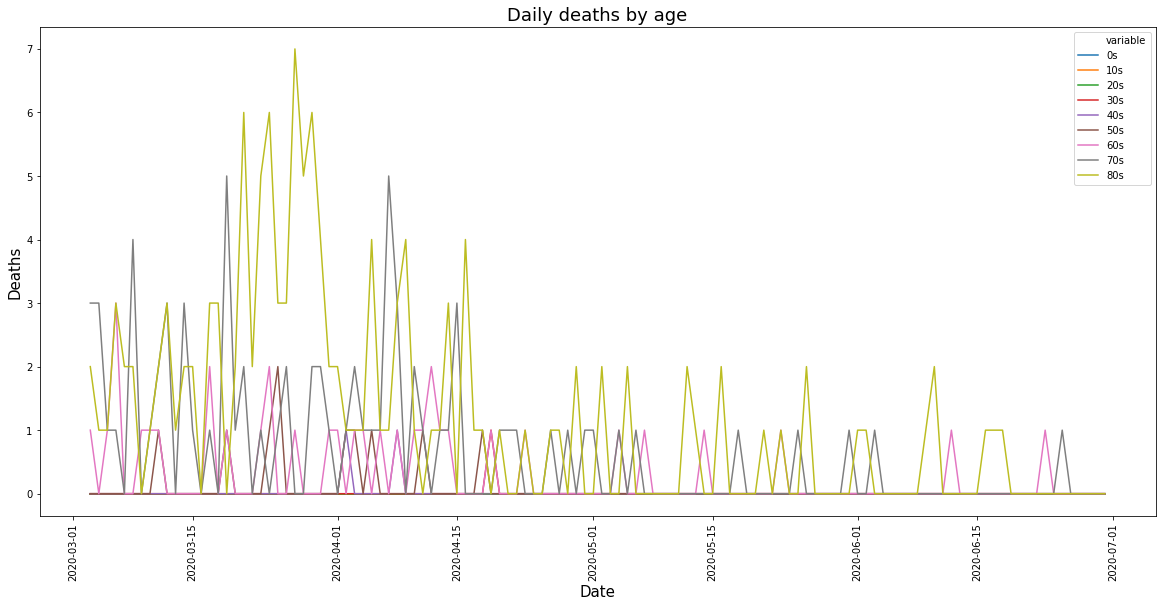

In [112]:
plt.figure(figsize=(20,9))
sns.lineplot(data=df_daily_deceased_melt, 
             x='date',
             y='value', 
             hue = 'variable')
plt.xlabel("Date", size=15)
plt.ylabel("Deaths", size=15)
plt.title("Daily deaths by age", size=18)
plt.xticks(rotation=90);